# Project Description 
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.
Data for 2016 may be incomplete.

# Project's Goal

Identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load & Overview the Data</h2>
</div>

Import libraries

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st
from scipy.stats import levene
import math as mt
from functools import reduce
import seaborn as sns
import random
#ignorning warning
warnings.simplefilter ('ignore')

make a try-except block in order to avoid file path error when working both locally and remotely.

In [1]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

NameError: name 'pd' is not defined

Check the table's first 5 rows to see the general information.

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Check the table's general structure

In [3]:
df.info()

NameError: name 'df' is not defined

percentage of missing values in all columns

In [2]:
df.isna().mean() * 100

NameError: name 'df' is not defined

Checking for duplicates

In [6]:
df.duplicated().sum()

0

Checking for the table's initial statistics

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Checking if all the critic scores are integers

storing the values without nulls

In [8]:
df_critic = df[df.Critic_Score.notnull()]

In [9]:
all(x.is_integer() for x in df_critic.Critic_Score)

True

In [10]:
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusion

#### After having a look at the table's general information, We discovered useful information regarding our data.
##### there are no duplicates in our data.
##### There are 6 column that contains missing values across the data.
name(0.011%), Year_of_Release(1.60%), Genre(0.011%), Critic_Score (51.31%), User_Score(40.08%), Rating(40.47%) are our columns with missing values in them. We see that name and genre lack only 0.011% - 2 rows and year_of_release have 1.6% missing values.

critic_score, user_score and rating all represent some kind of rating and by my logic its not coincidental that those are the columns with alot of missing data - games were just not rated.
Due to the large percentage of missing values we can't use our data to fill it.
We can't relay on a genre's average rating or even console + genre, as every game's rating varies and is not platform / genre dependant - it would be wrong to assume roughly 50% of the data by 50% of the data - I think this is too much % to fill.
We prefer to not change our data's distribution and will fill the misssing values with not available - 'N/A'.
##### There are several columns that their datatype should be changed.
Year_of_Release will be changed to int as it represents only one integer(the year).
Critic_Score should be changed to int, as we checked and all its values are integers.

##### Column names are not lower cased 
Column names will be lower cased.

##### Object values brief analysis
By looking at the describe method of our object type columns, we see that right now with our data -
The most popular game is Need for Speed: Most Wanted, but with not a big % of the games - we see its the most popular with 12 appereances and there are 11559 different games - big diversity.
Our most popular platform is PS2, and our most popular genre is Action.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data preperation</h2>
</div>

### Column lower casing

In [12]:
df.columns = [x.lower() for x in df.columns]

### Datatypes conversion

Converting years_of_release to int dtype

Dropping nulls in order to convert to int type

In [13]:
df = df[df['year_of_release'].notna()].reset_index(drop=True)

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### Conclusion
We have changed year_of_release to int as it represnts only the year (rounded number).

### Missing values proccesing

#### name and genre columns

Seeing that both missing rows from name and genre are the same rows, we will remove them due to them being just 2 rows out of our data(16715 rows)

In [16]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
df = df[df['name'].notna()].reset_index(drop=True)

In [19]:
df = df[df['genre'].notna()].reset_index(drop=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### year_of_release column

dealt in the data conversion part, checking no missing values remain.

In [21]:
df['year_of_release'].isna().sum()

0

#### critic_score, user_score, rating columns

filling with not available - N/A. explanation is at 1.1 (Conclusion) and in this stage's conclusion.

In [22]:
df['user_score'] = df['user_score'].fillna('N/A')

In [23]:
df['critic_score'] = df['critic_score'].fillna('N/A')

In [24]:
df['rating'] = df['rating'].fillna('N/A')

In [25]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,N/A,N/A,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,N/A,N/A,N/A
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,N/A,N/A,N/A
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,N/A,N/A,N/A


#### Conclusion
We removed the 2 rows with missing genre + name, we filled the missing values in critic_score, user_score and rating with N/A -

critic_score, user_score and rating all represent some kind of rating and by my logic its not coincidental that those are the columns with alot of missing data - games were just not rated.
Due to the large percentage of missing values we can't use our data to fill it.
We can't relay on a genre's average rating or even console + genre, as every game's rating varies and is not platform / genre dependant - it would be wrong to assume roughly 50% of the data by 50% of the data and therefore we fill it with N/A - not available.

Regarding the abbreviation TBD rating, it will be treated just like N/A - no rating available as it doesnt matter for us if there will be rating at the future or not - we don't have a rating right now.

### Total sales (the sum of sales in all regions) for each game calculation

Function to sum all sales

In [26]:
def total_sales(row):
    na=row['na_sales']
    eu=row['eu_sales']
    jp=row['jp_sales']
    other=row['other_sales']
    
    total_cost=na+eu+jp+other
    return total_cost

In [27]:
# apply our function to every row of our data.
df['total_sales']=df.apply(total_sales,axis=1)

In [28]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,N/A,N/A,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,N/A,N/A,N/A,31.38


#### Conclusion
We added a new total_sales (the sum of sales in all regions) column for every game.

### Conclusion

We have lower cased our columns names,
We have changed year_of_release to int as it represnts only the year (rounded number).

We removed rows with missing year (1.5% of data).
We removed the 2 rows with missing genre + name, we filled the missing values in critic_score, user_score and rating with N/A as there were no ratings / scores available.

We added a new total_sales (the sum of sales in all regions) column for every game.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

### games released per year analysis

creating a dataframe for the year and its game count

In [29]:
g_per_year = df.groupby(['year_of_release']).agg({'name': 'count'}).reset_index()

In [30]:
g_per_year.columns = ['year','games_count']

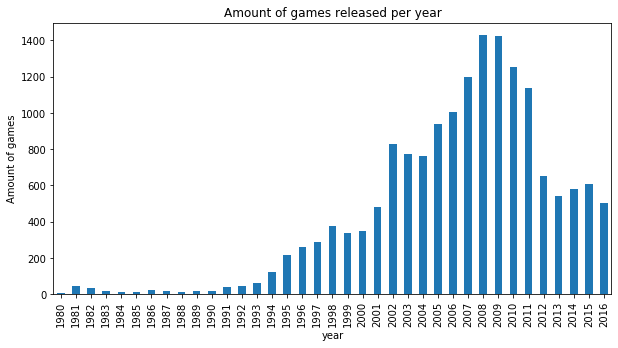

In [31]:
ax = g_per_year.plot(x='year',y='games_count',kind='bar',legend = False,figsize = (10,5),title='Amount of games released per year').set_ylabel("Amount of games")

#### Description
This graph shows our earlier years(1980-1994) had less than 200 games released per year.

We see the positive correlation between the year and the amount of games - it generally increases over the years.
We see our peak (max) amount of games are 1427 at 2008, and lowest (min) amount of games of 9 at 1980.

In [32]:
g_per_year.corr()

,year,games_count
year,1.000000,0.792978
games_count,0.792978,1.000000


In [33]:
g_per_year.describe()

,year,games_count
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


### Sales between platforms

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,N/A,N/A,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,N/A,N/A,N/A,31.38


In [35]:
p_sales = df.groupby(['platform']).agg({'total_sales': 'sum'}).reset_index()

Sorting by sales for better view

In [36]:
p_sales = p_sales.sort_values(by='total_sales').reset_index()

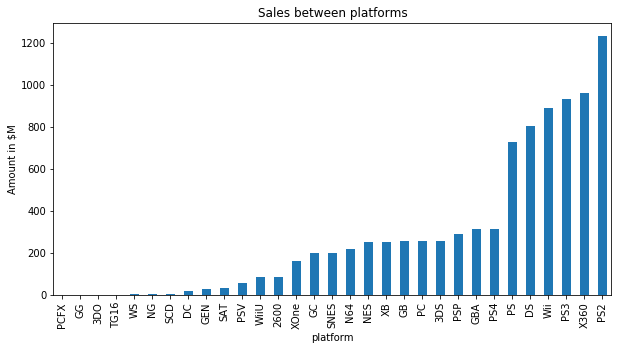

In [37]:
ax = p_sales.plot(x='platform',y='total_sales',kind='bar',figsize = (10,5),legend = False ,title='Sales between platforms').set_ylabel("Amount in $M")


#### Description
This graph shows our top 5 selling platforms are DS, Wii, PS3, X360, and PS2.

### Top platforms yearly sales distribution

choosing only data for the top 5 platforms

In [38]:
top5_names = p_sales['platform'].tail().to_list()

In [39]:
top5 = df.query('platform in @top5_names')

plotting the sales distribution by years for the top 5 platforms

In [40]:
top5_y_sales = top5.groupby(['year_of_release']).agg({'total_sales': 'sum'}).reset_index()

In [41]:
top5_y_sales.columns = ['year','total_sales']

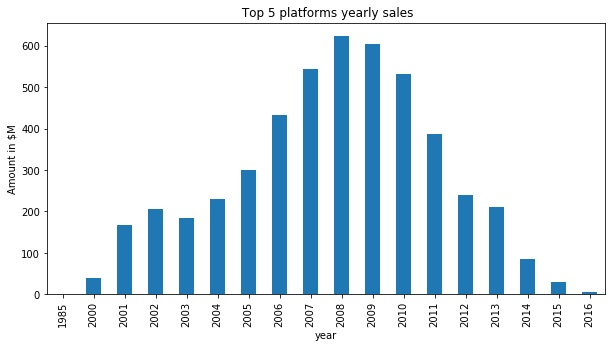

In [42]:
ax = top5_y_sales.plot(x='year',y='total_sales',kind='bar',figsize = (10,5),legend = False 
                  ,title=' Top 5 platforms yearly sales').set_ylabel("Amount in $M")

#### Description

This graph shows our top 5 platforms have their sales peak at 2008, and their sales decreasing after 2008.
This pattern some-what matches the graph about games released per year (section 3.1) where we saw our peak was at 2008, and then started to decrease.
This makes sense as the lower the games amount - it is likely the sales to be lower.


### platforms that used to be popular but now have zero sales analysis

We will look at 2 periods for popular platforms who have 0 sales in 2016: 1980-2000 and 2001-2010

creating a df until year of 2000 to see which platforms were popular back then and no longer have sales

In [43]:
df_2000 = df.query('year_of_release <= 2000')
df_2000_2 = df_2000.groupby(['platform']).agg({'total_sales': 'sum'}).reset_index()

sorting by total sales

In [44]:
df_2000_2 = df_2000_2.sort_values(by='total_sales').reset_index()
top5_old_names = df_2000_2['platform'].tail().to_list()

In [45]:
top5_old_names

['SNES', 'N64', 'GB', 'NES', 'PS']

slicing only the top 5 platforms until 2000 and plotting to see their sales pattern

In [46]:
top5_old = df.query('platform in @top5_old_names')
top5_old_sales = top5_old.groupby(['year_of_release']).agg({'total_sales': 'sum'}).reset_index()
top5_old_sales.columns = ['year','total_sales']

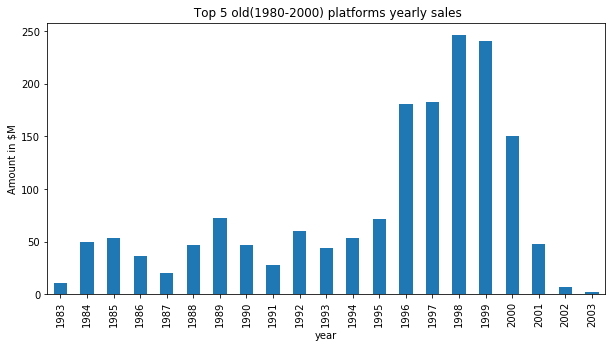

In [47]:
ax = top5_old_sales.plot(x='year',y='total_sales',kind='bar',figsize = (10,5),legend = False 
                  ,title=' Top 5 old(1980-2000) platforms yearly sales').set_ylabel("Amount in $M")

#### Description
This graph shows the lifetime of the sales of the 5 most popular platforms between 1980 and 2000.
We see their last year of selling was 2003, and their most successful years in terms of sales were 1996-2000.

all those platforms (SNES, N64, GB, NES, PS) have no sales after 2003.

creating a df until year of 2010 to see which platforms were popular back then and no longer have sales.

In [48]:
df_2010 = df.query('year_of_release > 2000 and year_of_release < 2011')
df_2010_2 = df_2010.groupby(['platform']).agg({'total_sales': 'sum'}).reset_index()

sorting by total sales

In [49]:
df_2010_2 = df_2010_2.sort_values(by='total_sales').reset_index()
top5_medium_names = df_2010_2['platform'].tail().to_list()

In [50]:
df_2010_2.tail(8)

,index,platform,total_sales
7,14,XB,250.58
8,10,PSP,260.52
9,3,GBA,312.81
10,9,PS3,485.77
11,13,X360,580.86
12,1,DS,764.03
13,12,Wii,796.16
14,8,PS2,1193.94


In [51]:
top5_medium_names

['PS3', 'X360', 'DS', 'Wii', 'PS2']

Checking if any of the top 5 between 2000-2010 has sales in 2016, if it does - it will be replaced with the next most popular platform

In [52]:
df.query('platform in @top5_medium_names and year_of_release == 2016')['platform'].value_counts()

PS3     38
X360    13
Wii      1
Name: platform, dtype: int64

PS3, X360, and Wii have sales in 2016, and are replaced with GBA, PSP and XB who are the next most popular platform without sales in 2016

In [53]:
top5_medium_names = ['XB', 'PSP', 'GBA', 'DS', 'PS2']

Veryifing no sales in 2016 for all popular 2000-2010 platforms

In [54]:
df.query('platform in @top5_medium_names and year_of_release == 2016')['platform'].value_counts()

Series([], Name: platform, dtype: int64)

slicing only the top 5 platforms between 2000-2010 and plotting to see their sales pattern

In [55]:
top5_medium = df.query('platform in @top5_medium_names')
top5_medium_sales = top5_medium.groupby(['year_of_release']).agg({'total_sales': 'sum'}).reset_index()
top5_medium_sales.columns = ['year','total_sales']

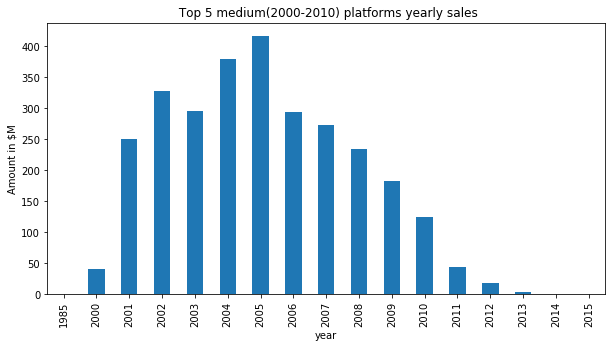

In [56]:
ax = top5_medium_sales.plot(x='year',y='total_sales',kind='bar',figsize = (10,5),legend = False 
                  ,title=' Top 5 medium(2000-2010) platforms yearly sales').set_ylabel("Amount in $M")

#### Description
This graph shows the lifetime of sales for the 5 most popular platforms between the years of 2000-2010 who didnt manage to have sale in 2016.
We see that their peak was in 2005, and from then on the amount of sales decreased until the point of having no sales in 2016.

All those platforms ('XB', 'PSP', 'GBA', 'DS', 'PS2') have no sales in 2016.

#### Conclusion

Platforms that used to be popular but now have zero sales are:

SNES, N64, GB, NES, PS - most popular between 1980-2000.

XB, PSP, GBA, DS, PS2 - most popular between 2001-2010 with no sales in 2016.

### How long does it generally take for new platforms to appear and old ones to fade analysis

Finding every platform's first release year (their appearance)

In [57]:
first_year = df.groupby(['platform']).agg({'year_of_release': 'min'}).reset_index()

In [58]:
first_year = first_year.sort_values(by='platform').reset_index(drop=True)

In [59]:
first_year.columns = ['platform','first_year']

Finding every platform's last release year (their last year of sales)

In [60]:
last_year = df.groupby(['platform']).agg({'year_of_release': 'max'}).reset_index()

In [61]:
last_year = last_year.sort_values(by='platform').reset_index(drop=True)

In [62]:
last_year.columns = ['platform','last_year']

adding the last release year column to the first_year df.

In [63]:
first_year['last_year'] = last_year['last_year']

sorting by the oldest platform to the newest and storing in a new df - platform_life

In [64]:
platform_life = first_year.sort_values(by='first_year').reset_index(drop=True)

In [65]:
platform_life

,platform,first_year,last_year
0,2600,1980,1989
1,NES,1983,1994
2,DS,1985,2013
3,PC,1985,2016
4,GB,1988,2001
5,SNES,1990,1999
6,GEN,1990,1994
7,GG,1992,1992
8,SCD,1993,1994
9,NG,1993,1996


adding a lifetime column

In [66]:
platform_life['lifetime'] = (platform_life['last_year'] - platform_life['first_year'])

checking how long does it generally take for old platforms to fade

In [67]:
platform_life.query('last_year < 2016 and first_year >= 1980 and first_year <= 2000')['lifetime'].mean()

6.85

Checking how long does it generally take for new platforms to appear (2001+) (15 is the amount of years between 2001 and 2016)

In [68]:
15 / len(platform_life.query('first_year >= 2001'))

1.5

#### conclusion
We see that generally an old(1980-2000) platform fades after 6.85 years,

And  a new(2001-2016) platform generally appears every 1.5 years.(10 new platforms in 15 years)

### Which platforms are leading in sales? Which ones are growing or shrinking? 
(Selecting several potentially profitable platforms)

new dataframe for the chosen period to work with.(the last 10 years, 2006-2016)

we will use the previously made platform_life df to choose only the platforms that have sales in 2016

In [69]:
df_new2 = platform_life.query('last_year == 2016')

In [70]:
names = df_new2.platform.to_list()

In [71]:
names

['PC', 'X360', 'PS3', 'Wii', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']

In [72]:
df_filtered = df.query('platform in @names')

creating a df for sales per platform to see which are leading in sales

In [73]:
p_sales = df_filtered.groupby('platform').agg({'total_sales': 'sum'}).reset_index().sort_values(by='total_sales',ascending=False)

In [74]:
p_sales = p_sales.reset_index(drop=True)

In [75]:
p_sales

,platform,total_sales
0,X360,961.24
1,PS3,931.34
2,Wii,891.18
3,PS4,314.14
4,3DS,257.81
5,PC,255.76
6,XOne,159.32
7,WiiU,82.19
8,PSV,53.81


storing the names

In [76]:
names = p_sales['platform'].to_list()

In [77]:
names

['X360', 'PS3', 'Wii', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']

for loop to plot every platform with sales in 2016 to see if it's shrinking or it has growth potential

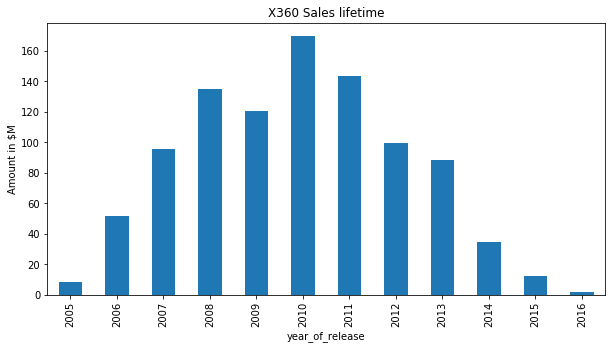

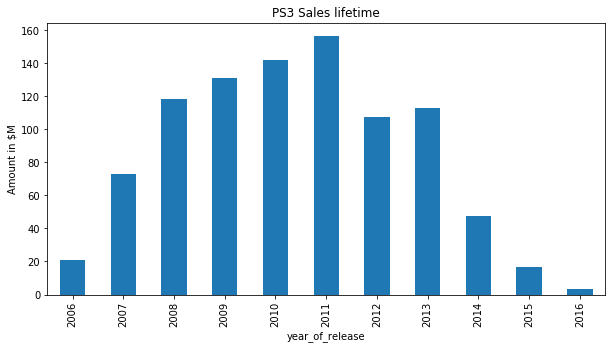

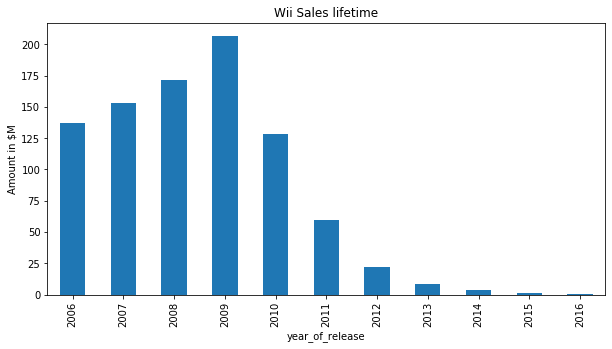

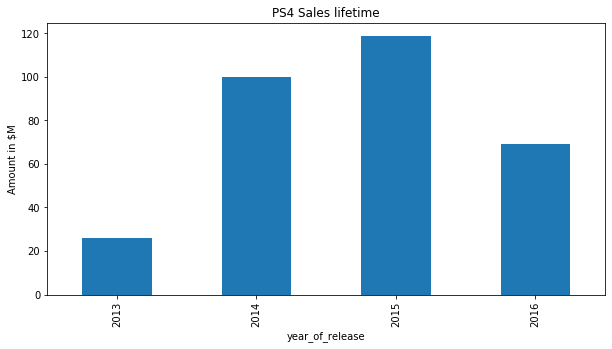

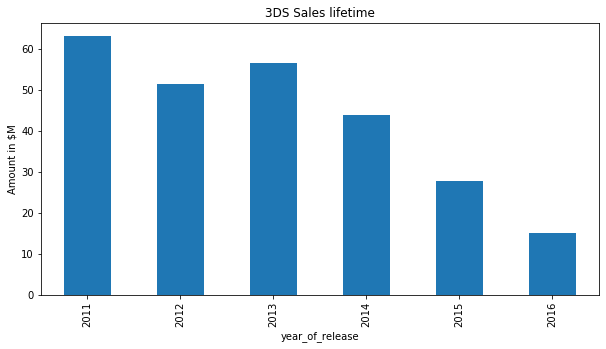

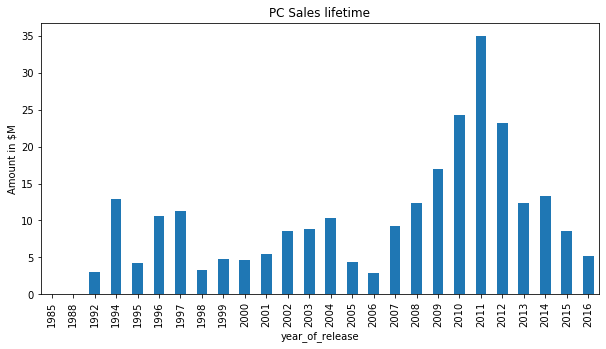

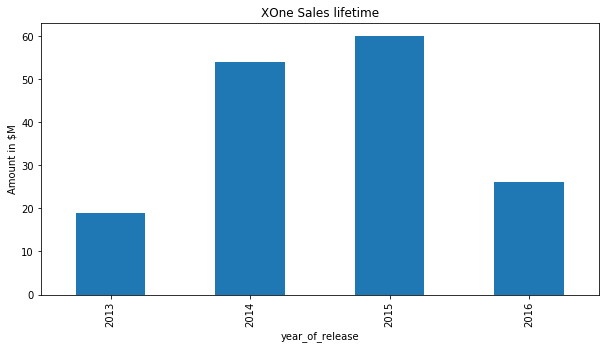

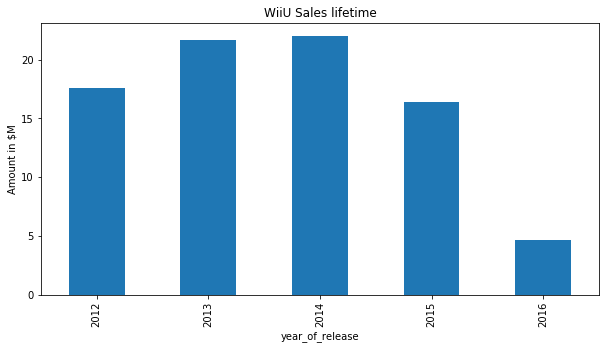

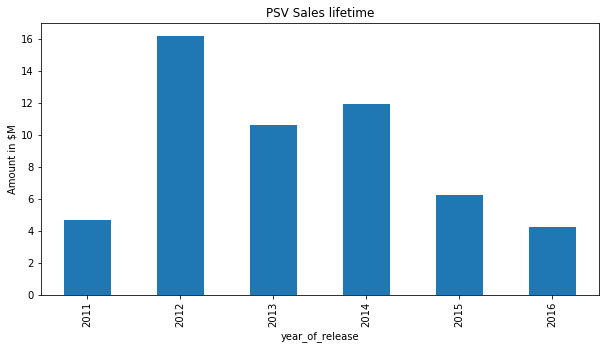

In [78]:
for i in names:
    df.query('platform == @i').groupby('year_of_release').agg({'total_sales':'sum'}).reset_index().plot(x='year_of_release',y='total_sales',kind='bar',figsize = (10,5),legend = False 
                  ,title=i + ' Sales lifetime').set_ylabel("Amount in $M");

#### Conclusion

after plotting every platform that has sales in 2016 in order to figure out its pattern and decide if it's potentially profitable,
We decide to pick PS4 and XOne due to their large volume in sales, their growth until 2016 and relative similar graph patterns(taking in account the data for 2016 is incomplete and it explains the decrease in sales).
In addition, we pick WiiU as it's more consistent than the rest of the platforms (taking in account the data for 2016 is incomplete and it explains the decrease in sales).

The platforms that have sales in 2016 who shows clear shrink are: PS3, X360, Wii, 3DS and PSV. PC looks unstable but is decreasing from 2011 to 2016.

Chosen platforms - PS4, XOne and WiiU

### Box plot for the global sales of all games, broken down by platform. 

In [79]:
chosen = df.query('platform in ["PS4", "XOne", "WiiU"]')

finding average game global sales per platform

In [80]:
chosen.query('platform == "PS4"')['total_sales'].mean()

0.8013775510204081

In [81]:
chosen.query('platform == "XOne"')['total_sales'].mean()

0.6450202429149797

In [82]:
chosen.query('platform == "WiiU"')['total_sales'].mean()

0.5591156462585034

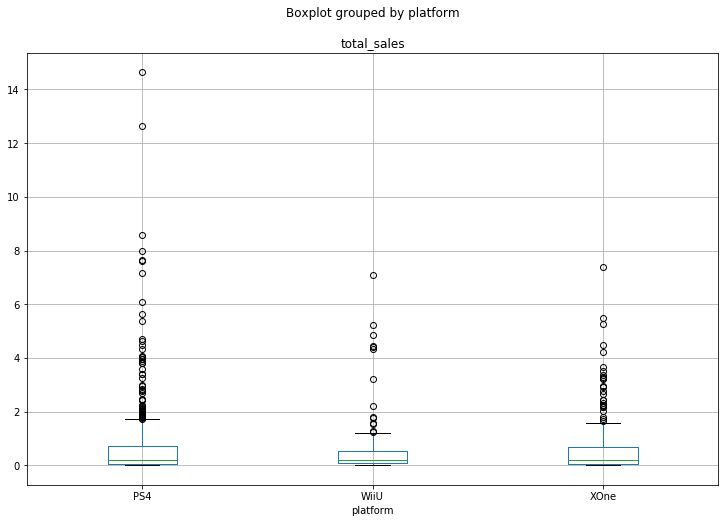

In [83]:
chosen.boxplot(by ='platform', column =['total_sales'], grid = True, figsize = (12,8));

#### Description & Conclusion
This boxplot shows the global sales of all games broken down by our platforms.
We can definetly see the density in PS4's upper outliers is much higher, and reaches higher values(Sales in $M).
The difference in sales is significant by looking at the boxplots - 

PS4 with the most sales and with the highest value of sales (highest upper outliers), XOne ranks second and WiiU ranks third.
Regarding the average sales between the platforms - We can tell they are relatively closer than the gaps between sales and sales values - 

PS4's average sale (game's global sales) is 801K (0.801M)

XOne's average sale (game's global sales) is 645K (0.645M)

WiiU's average sale (game's global sales) is 559K (0.559M)


### How user and professional reviews affects on sales analysis

Creating 2 functions to calculate correlation and plot for user_score and critic_score effects on total_sales

In [84]:
def user_score_effect(platform):
    data_platform = chosen.query('platform == @platform and user_score != "N/A" and user_score != "tbd"')
    data_platform['user_score'] = data_platform['user_score'].astype(float)
    data_platform.plot(kind='scatter', x='user_score', y='total_sales',title=platform +' user score to total sales scatter plot');
    return print('Correlation between user_score to total_sales: {}'.format(data_platform['user_score'].corr(data_platform['total_sales'])))


def critic_score_effect(platform):
    data_platform = chosen.query('platform == @platform and critic_score != "N/A" and critic_score != "tbd"')
    data_platform['critic_score'] = data_platform['critic_score'].astype(int)
    data_platform.plot(kind='scatter', x='critic_score', y='total_sales',title=platform +' critic score to total sales scatter plot');
    return print('Correlation between critic_score to total_sales: {}'.format(data_platform['critic_score'].corr(data_platform['total_sales'])))

#### PS4

Users score:

Correlation between user_score to total_sales: -0.031957110204556424


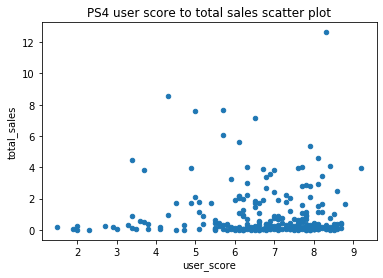

In [85]:
user_score_effect('PS4')

##### Description

This scatter plot shows the effect of the user's score on the sales.
After looking at the plot and at the correlation, we see that there is almost no correlation between the user's rating and the total sales.
We also see users tend to score above 5.5, and generally it doesnt affect the total sales.

Critic score:

Correlation between critic_score to total_sales: 0.40656790206178095


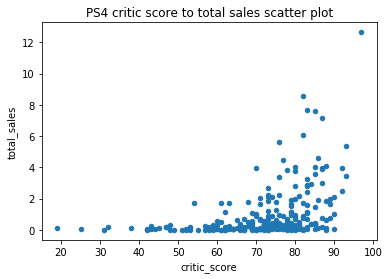

In [86]:
critic_score_effect('PS4')

##### Description
This scatter plot shows the effect of the critic's score on the sales. After looking at the plot and at the correlation, we see that there is a positive correlation between the critic's score and the total sales.
Generally, The Higher the critic score is, the higher the total sales are.

#### XOne

User score:

Correlation between user_score to total_sales: -0.06892505328279414


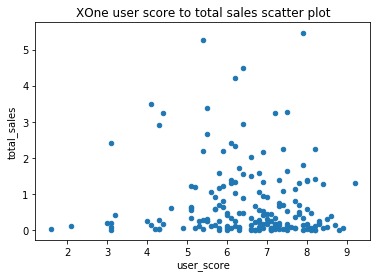

In [87]:
user_score_effect('XOne')

##### Description
This scatter plot shows the effect of the user's score on the sales. After looking at the plot and at the correlation, we see that there is almost no correlation between the user's rating and the total sales.

Critic score:

Correlation between critic_score to total_sales: 0.4169983280084017


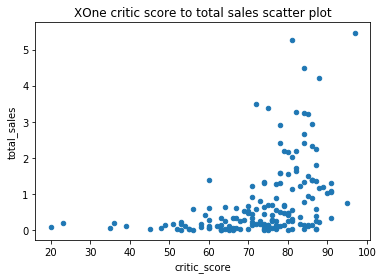

In [88]:
critic_score_effect('XOne')

##### Description
This scatter plot shows the effect of the critic's score on the sales. After looking at the plot and at the correlation, we see that there is a positive correlation between the critic's score and the total sales. Generally, The Higher the critic score is, the higher the total sales are.

#### WiiU

User score:

Correlation between user_score to total_sales: 0.4002190202148617


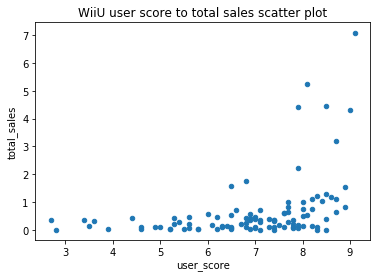

In [89]:
user_score_effect('WiiU')

##### Description
This scatter plot shows the effect of the user's score on the sales. After looking at the plot and at the correlation, we see that there a positive correlation between the user's rating and the total sales.
Generally, The Higher the user score is, the higher the total sales are.

Critic score:

Correlation between critic_score to total_sales: 0.34837976012017485


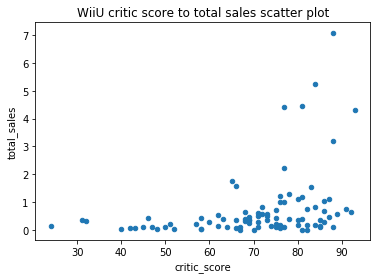

In [90]:
critic_score_effect('WiiU')

##### Description
This scatter plot shows the effect of the critic's score on the sales. After looking at the plot and at the correlation, we see that there a positive correlation between the critic's rating and the total sales. Generally, The Higher the critic score is, the higher the total sales are.

#### Conclusion

PS4:

We can conclude There is no correlation between user's rating and total sales's value, And there is a positive correlation between the critic's score to the total sales's value.

We learn about the PS4's customers behaviour - the customer doesn't consider the user's score much, but generally does consider the critic's score.

XOne:

We can conclude There is no correlation between user's rating and total sales's value, And there is a positive correlation between the critic's score to the total sales's value.

We learn about the XOne's customers behaviour - the customer doesn't consider the user's score much, but generally does consider the critic's score.

WiiU:

We can conclude There is a  positive correlation between user's rating and total sales's value, And there is another positive correlation between the critic's score to the total sales's value.
The correlation of the users rating is a bit stronger.

We learn about the XOne's customers behaviour - the customer considers both the user's score and the critic's score, with slightly more consideration on the user's score(stronger correlation)

Overall:

Critic score affects the total sales in all platforms, User score affects the total sale only in WiiU.

### Genre sales analysis

#### distribution of games by genre analysis

slicing and plotting distribution of games by genre

In [91]:
genres_games = chosen.groupby('genre').agg({'name':'count'}).reset_index()

In [92]:
genres_games.columns = ['genre','games_count']

In [93]:
genres_games = genres_games.sort_values(by='games_count',ascending=False)

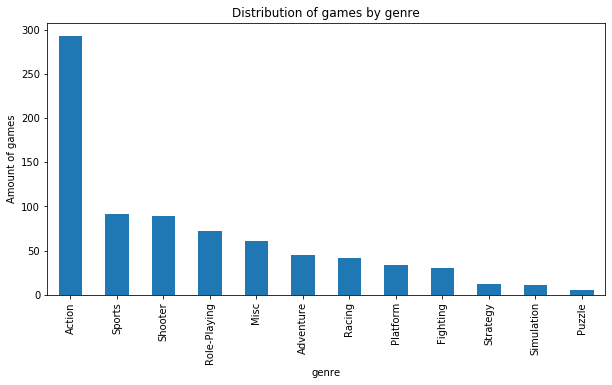

In [94]:
genres_games.plot(x='genre',y='games_count', kind='bar', figsize = (10,5), legend=False, title='Distribution of games by genre').set_ylabel("Amount of games");

##### Description
This graph shows the highest amount of gamse are under action genre, followed by sports and shooter genres.
Strategy, simulation and puzzle have the least amount of games.

#### most profitable genres analysis

slicing and plotting total sales by genre

In [95]:
genres_sales = chosen.groupby('genre').agg({'total_sales':'sum'}).reset_index()

In [96]:
genres_sales = genres_sales.sort_values(by='total_sales',ascending=False).reset_index(drop=True)

In [97]:
genres_sales

,genre,total_sales
0,Shooter,154.90
1,Action,152.48
2,Sports,85.51
3,Role-Playing,42.43
4,Platform,30.15
5,Racing,29.80
6,Misc,28.08
7,Fighting,17.37
8,Adventure,9.19
9,Strategy,2.28


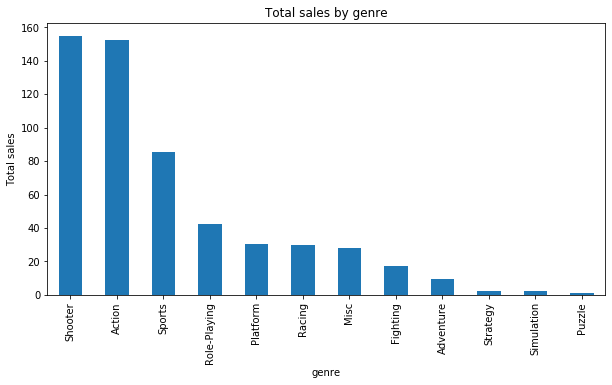

In [98]:
genres_sales.plot(x='genre',y='total_sales', kind='bar', figsize = (10,5), legend=False, title='Total sales by genre').set_ylabel("Total sales");

##### Description
This graph shows the best selling genres are shooter and action, with shooter leading despite having much lower amount of games compared to action genre which can conclude to - the mean sales of shooter game being much higher than the mean sales of action genre game.

In [99]:
chosen.query('genre == "Shooter"')['total_sales'].mean()

1.7404494382022468

In [100]:
chosen.query('genre == "Action"')['total_sales'].sum()

152.48

sorting by genre for the new columns to match,
adding new avg_game_sales and games_amount columns.

In [101]:
genres_sales = genres_sales.sort_values(by='genre').reset_index(drop=True)

In [102]:
genres_sales['avg_game_sales'] = chosen.groupby('genre').agg({'total_sales':'mean'}).reset_index(drop=True)

In [103]:
genres_sales['games_amount'] = chosen.groupby('genre').agg({'name':'count'}).reset_index(drop=True)

In [104]:
genres_sales = genres_sales.sort_values(by='total_sales',ascending=False).reset_index(drop=True)

In [105]:
genres_sales

,genre,total_sales,avg_game_sales,games_amount
0,Shooter,154.90,1.740449,89
1,Action,152.48,0.520410,293
2,Sports,85.51,0.929457,92
3,Role-Playing,42.43,0.589306,72
4,Platform,30.15,0.886765,34
5,Racing,29.80,0.709524,42
6,Misc,28.08,0.460328,61
7,Fighting,17.37,0.579000,30
8,Adventure,9.19,0.204222,45
9,Strategy,2.28,0.190000,12


In [106]:
genres_sales.corr()

,total_sales,avg_game_sales,games_amount
total_sales,1.000000,0.712802,0.807480
avg_game_sales,0.712802,1.000000,0.212233
games_amount,0.807480,0.212233,1.000000


#### Conclusion
After plotting and creating a generelizing table about the genres sales we can conclude the following:

- Action genre has the highest amount of games.
- Shooter genre has the highest total sales and the highest average sales per game
- Puzzle has the lowest value of any metric (total sales, avg game sales and games amount)

There is a strong correlation between the average sales of a game and the total sales - as we can see, the shooter genre surpassed the sales of the action genre despite having much lower amount of games - 89 to 293.

We can generalize about genres with high and low sales that genres with high sales have a high amount of games and high average sale per game, while genres with low sales have both low amount of games and low average sale per game.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>User profile creation for each region (NA, EU, JP)</h2>
</div>

#### Regions sales distribution by their top 5 platforms

creating a dataframe with regions and their top 5 selling platforms and plotting it.

extracting top5 platforms for every region

In [107]:
df_new = df.query('year_of_release >= 2006')

In [108]:
regions = df_new.groupby('platform').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).reset_index()

In [109]:
regions

,platform,na_sales,eu_sales,jp_sales
0,3DS,82.65,61.27,100.62
1,DC,0.00,0.00,0.06
2,DS,323.99,142.99,141.49
3,GBA,5.15,1.88,1.51
4,GC,8.72,2.34,0.21
5,PC,44.45,100.32,0.00
6,PS2,114.89,46.28,35.93
7,PS3,390.13,327.21,79.41
8,PS4,108.74,141.09,15.96
9,PSP,80.54,54.21,70.63


In [110]:
na5 = regions[['platform','na_sales']].sort_values(by='na_sales',ascending=False).head().reset_index(drop=True)
eu5 = regions[['platform','eu_sales']].sort_values(by='eu_sales',ascending=False).head().reset_index(drop=True)
jp5 = regions[['platform','jp_sales']].sort_values(by='jp_sales',ascending=False).head().reset_index(drop=True)

merging and creating the new dataframe

In [111]:
data_frames = [na5, eu5, jp5]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['platform'],
                                        how='outer'), data_frames)

In [112]:
df_merged

,platform,na_sales,eu_sales,jp_sales
0,X360,588.84,267.89,NaN
1,Wii,486.87,258.32,68.28
2,PS3,390.13,327.21,79.41
3,DS,323.99,142.99,141.49
4,PS2,114.89,NaN,NaN
5,PS4,NaN,141.09,NaN
6,3DS,NaN,NaN,100.62
7,PSP,NaN,NaN,70.63


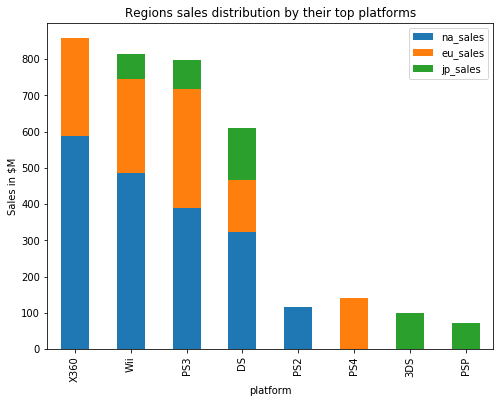

In [113]:
df_merged.plot.bar(stacked=True,figsize=(8,6),x='platform',title='Regions sales distribution by their top platforms').set_ylabel('Sales in $M');

##### Description
This graph shows the disribution of regions sales between their top platforms.

NA's top 5 platforms by decsending order(largest to smallest): X360, Wii, PS3, DS , PS2

EU's top 5 platforms by decsending order(largest to smallest): PS3, X360, Wii, DS, PS4

JP's top 5 platforms by decsending order(largest to smallest): DS, 3DS, PS3, PSP, Wii

We can conclude that DS, Wii and PS3 are being in the top 5 platforms for all regions.

#### Top 5 genres per region

In [114]:
genres = df_new.groupby('genre').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).reset_index()

In [115]:
na5g = genres[['genre','na_sales']].sort_values(by='na_sales',ascending=False).head().reset_index(drop=True)
eu5g = genres[['genre','eu_sales']].sort_values(by='eu_sales',ascending=False).head().reset_index(drop=True)
jp5g = genres[['genre','jp_sales']].sort_values(by='jp_sales',ascending=False).head().reset_index(drop=True)

In [116]:
data_frames = [na5g, eu5g, jp5g]
df_g_merged = reduce(lambda  left,right: pd.merge(left,right,on=['genre'],
                                        how='outer'), data_frames)

In [117]:
df_g_merged

,genre,na_sales,eu_sales,jp_sales
0,Action,530.44,350.70,102.07
1,Sports,396.64,251.55,48.97
2,Shooter,373.13,238.89,NaN
3,Misc,285.06,146.88,64.53
4,Role-Playing,199.63,NaN,170.38
5,Racing,NaN,113.39,NaN
6,Platform,NaN,NaN,35.20


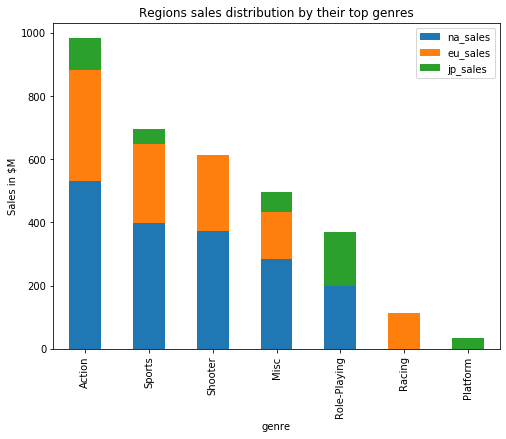

In [118]:
df_g_merged.plot.bar(stacked=True,figsize=(8,6),x='genre',title='Regions sales distribution by their top genres').set_ylabel('Sales in $M');

##### Description
This graph shows the disribution of regions sales between their top genres.

NA's top 5 platforms by decsending order(largest to smallest): Action, Sports, Shooter, Misc , Role-Playing

EU's top 5 platforms by decsending order(largest to smallest): Action, Sports, Shooter, Misc, Racing

JP's top 5 platforms by decsending order(largest to smallest): Role-Playing, Action, Misc, Sports, Platform

We can conclude that NA's and Eu's top 5 genres are almost the same (sharing the same top 4 genres),
And action, sports and misc are being in top 5 genres of all regions.

#### ESRB ratings effects on  sales  analysis

In [119]:
df_new['rating'].unique()

array(['E', 'M', 'N/A', 'T', 'E10+', 'EC', 'RP'], dtype=object)

In [120]:
esrb = df_new.groupby('rating').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).reset_index()

dropping N/A values as they dont represent rating.

In [121]:
esrb = esrb[esrb.rating != "N/A"]


In [122]:
esrb

,rating,na_sales,eu_sales,jp_sales
0,E,796.98,461.09,120.36
1,E10+,315.40,173.35,36.57
2,EC,1.32,0.00,0.00
3,M,574.33,398.90,43.79
5,RP,0.00,0.03,0.00
6,T,424.14,235.44,83.90


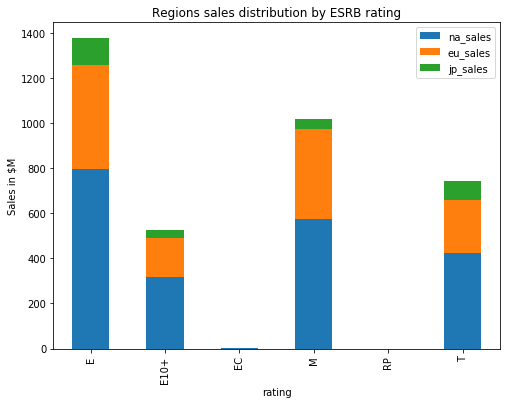

In [123]:
esrb.plot.bar(stacked=True,figsize=(8,6),x='rating',title='Regions sales distribution by ESRB rating').set_ylabel('Sales in $M');

In [124]:
df_new.query('rating == "EC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4238,Nickelodeon Team Umizoomi,DS,2011,Action,0.42,0.0,0.0,0.03,N/A,tbd,EC,0.45
4964,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.35,0.0,0.0,0.02,N/A,tbd,EC,0.37
5956,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.27,0.0,0.0,0.02,N/A,tbd,EC,0.29
7466,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,0.19,0.0,0.0,0.01,N/A,tbd,EC,0.20
12859,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.0,0.0,0.00,N/A,tbd,EC,0.05
13245,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010,Misc,0.04,0.0,0.0,0.00,N/A,tbd,EC,0.04


##### Description 
The graph shows ESRB ratings do affect sales in individual regions, as We see the E rating (Everyone) is the top selling rating - which makes sense due to the rating's meaning - it means the game is suitable for everyone.

The next best selling ratings across all regions is M(Mature), followed by T(Teen) and E10+.

rating of EC(Early childhood) has low amount of sales just in NA.

### Conclusion

After plotting the disribution of regions sales between their top platforms we conclude:
    
DS, Wii and PS3 are being in the top 5 platforms for all regions.
    
NA's best selling platform - X360
    
EU's best selling platform - PS3
    
JP's best selling platform - DS

    
After plotting the disribution of regions sales between their top genres we conclude:
    
We can conclude that NA's and Eu's top 5 genres are almost the same (sharing the same top 4 genres), And action, sports and misc are being in top 5 genres of all regions.
    
NA's best selling genre - Action
    
EU's best selling genre - Action
    
JP's best selling genre - Role-Playing


    
After plotting the regions sales distribution by ESRB rating we conclude:
    
the E rating (Everyone) is the top selling rating.

The next best selling ratings across all regions is M(Mature), followed by T(Teen) and E10+.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hypotheses testing</h2>
</div>

### The Average user ratings of the Xbox One and PC platforms are the same

Our null hypothesis (h0) will be: The Average user ratings of the Xbox One and PC platforms are equal.

Our alternative hypothesis (h1) is based on h0 and will be: The Average user ratings of the Xbox One and PC platforms are different.

Creating dataframes for the ratings for both platforms

In [125]:
xone_ratings = df_new.query('platform == "XOne" and user_score != "N/A" and user_score != "tbd"')['user_score'].astype(float).to_list()
pc_ratings = df_new.query('platform == "PC" and user_score != "N/A" and user_score != "tbd"')['user_score'].astype(float).to_list()

In [126]:
len(xone_ratings)

182

In [127]:
len(pc_ratings)

615

Taking a sample from the pc_ratings to match the amount of xone_ratings

In [128]:
pc_ratings_sample = random.sample(pc_ratings, len(xone_ratings))

Declaring our alpha value - 5% which is the most common and recommended value to use.

In [129]:
alpha = 0.05

Checking the varience values for both parameters for the equal_var parameter using levene's test with both median and mean center parameters.

In [130]:
levene(xone_ratings, pc_ratings_sample, center='median')

LeveneResult(statistic=0.15545044236835576, pvalue=0.6936123656419032)

In [131]:
levene(xone_ratings, pc_ratings_sample, center='mean')

LeveneResult(statistic=0.4247070405967089, pvalue=0.5150111429552697)

our resulted pvalue is a high number(higher than alpha value), which means we cant deny our variances are equal and will set the parameter equal_var=True

In [132]:
results = st.ttest_ind(xone_ratings, pc_ratings_sample, equal_var =True)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04576999872807564
We reject the null hypothesis


our pvalue is higher than our alpha value, so we can't reject the null hypothesis which is - 

The Average user ratings of the Xbox One and PC platforms are the same.

### The Average user ratings for the Action and Sports genres are different.

Our null hypothesis (h0) will be: The Average user ratings for the action and sports platforms are equal.

Our alternative hypothesis (h1) is based on h0 and will be: The Average user ratings for the Action and Sports genres are different

Creating dataframes for the ratings for both platforms

In [133]:
action_ratings = df_new.query('genre == "Action" and user_score != "N/A" and user_score != "tbd"')['user_score'].astype(float).to_list()
sports_ratings = df_new.query('genre == "Sports" and user_score != "N/A" and user_score != "tbd"')['user_score'].astype(float).to_list()

In [134]:
len(action_ratings)

1324

In [135]:
len(sports_ratings)

676

Taking a sample from the action_ratings to match the amount of sports_ratings

In [136]:
action_ratings_sample = random.sample(action_ratings, len(sports_ratings))

Alpha value remains 0.05

In [137]:
alpha = 0.05

Checking the varience values for both genres for the equal_var parameter using levene's test with both median and mean center parameters.

In [138]:
levene(action_ratings_sample, sports_ratings, center='median')

LeveneResult(statistic=19.04650675469628, pvalue=1.3729110619699575e-05)

In [139]:
levene(action_ratings_sample, sports_ratings, center='mean')

LeveneResult(statistic=24.861936446793063, pvalue=6.958210422893653e-07)

our resulted pvalue is a very low number, which means our variances are not equal.

In [140]:
results = st.ttest_ind(action_ratings_sample, sports_ratings, equal_var =False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.7044558292212026e-09
We reject the null hypothesis


our pvalue is very low, and we reject the null hypothesis which is - The Average user ratings for the action and sports platforms are equal.

Which means we can accept our h1  - The Average user ratings for the Action and Sports genres are different.

### Conclusion
After testing the hypotheses for:

- The Average user ratings of the Xbox One and PC platforms are the same.

- The Average user ratings for the Action and Sports genres are different.


we weren't able to reject the null hypothesis for the first statement, which means we cant say the average user ratings for XOne and PC are different. 

we were able to reject the null hypothesis for the second statement, which means we can say The average user ratings for the Action and Sports genres are different.


the significance level used to test the hypotheses is alpha value of 0.05 (5%) as this is the best practice and most common used. the null hypotheses were formulated to claim equality, as this is the h0 for comparing two population means, and the alternative claims for difference between the population and is dependant if we can reject the h0 (equality) or not.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>General Conclusion</h2>
</div>

To summarize, we concluded many conclusions regarding different aspects of the data:

In the data's preparation & processing stage:
- There are 6 column that contains missing values across the data:

- name(0.011%), Year_of_Release(1.60%), Genre(0.011%), Critic_Score (51.31%), User_Score(40.08%), Rating(40.47%).

- We removed the 2 rows with missing genre + name, we filled the missing values in critic_score, user_score and rating with N/A.
- TBD rating will be treated like N/A - no available rating.

- We added a new total_sales (the sum of sales in all regions) column for every game.


In the exploratory data analysis stage:
- We see a positive correlation between the year and the amount of games - it generally increases over the years.
- our top 5 selling platforms are DS, Wii, PS3, X360, and PS2

- our top 5 platforms have their sales peak at 2008, and their sales decreasing after 2008.
   This pattern matches the graph about games released per year (section 3.1) where we saw our peak was at 2008, and then    started to decrease. This makes sense as the lower the games amount - it is likely the sales to be lower.
- Platforms that used to be popular but now have zero sales are:
  SNES, N64, GB, NES, PS - most popular between 1980-2000.
  XB, PSP, GBA, DS, PS2 - most popular between 2001-2010 with no sales in 2016.
  
-  Generally an old(1980-2000) platform fades after 6.85 years.
   And a new(2001-2016) platform generally appears every 1.5 years.(10 new platforms in 15 years).
   
- Chosen platforms that are potentially profitable - PS4, XOne, WiiU.
- Platforms that have sales in 2016 who shows clear shrink are: PS3, X360, Wii, 3DS and PSV.
- PS4's average sale (game's global sales) is 801K (0.801M)
  XOne's average sale (game's global sales) is 645K (0.645M)
  WiiU's average sale (game's global sales) is 559K (0.559M)
 
- Critic score positively affects the total sales in all chosen platforms, User score affects the total sale only on WiiU.
- Action genre has the highest amount of games and is the second most selling genre.
- Shooter genre has the highest total sales and the highest average sales per game
- Puzzle genre has the lowest value of any metric (total sales, avg game sales and games amount).

In the User profile creation for each region (NA, EU, JP) stage:
- DS, Wii and PS3 are being in the top 5 platforms for all regions.

- NA's best selling platform - X360

- EU's best selling platform - PS3

- JP's best selling platform - DS
- action, sports and misc are being in top 5 genres of all regions.

- NA's best selling genre - Action

- EU's best selling genre - Action

- JP's best selling genre - Role-Playing

- the E rating (Everyone) is the top selling ESRB rating.

In the Tests of the hypotheses stage:
1. The Average user ratings of the Xbox One and PC platforms are the same.
 We weren't able to reject the null hypothesis for the statement, which means we cant say the average user ratings for XOne and PC are different.
 
2. The Average user ratings for the Action and Sports genres are different.
 We were able to reject the null hypothesis for statement, which means we can say The average user ratings for the Action and Sports genres are different.


Patterns that determine whether a game succeeds or not(in order to spot potential big winners and plan advertising campaigns)-

- The game needs to be in atleast one of the chosen platforms (PS4, XOne, WiiU).
- The higher the critic's score - the higher the sales for the game.
- The game's genre should be either Action, Shooter or Sports.
- The game's ESRB rating should be E / E10+ / M.